# Chapter 02

In [1]:
# preamble
from sympy import *
init_printing()

import pint
ureg = pint.UnitRegistry()

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 02.44

Write a computer program to fit a straight line $ y = a x + b $ to tabulated $(x, y)$ data assuming that no more than 100 data points will be taken in any one run. Your program should read in and store the data, evaluate the slope $a$ and intercept $b$ of the best line through the data using Equations A.1-3 through A.1-5 in Appendix A, then print out the measured values of $x$ and $y$ and calculated values of $y(= a x + b)$ for each tabulated value of $x$. 

Test your program by fitting a line to the data in the following table.

In [2]:
# given data
xdata = [1.0, 1.5, 2.0, 2.5, 3.0]
ydata = [2.35, 5.53, 8.92, 12.15, 15.38]

### Method of Least Squares (from Appendix A)
A.1-3
$$ s_x    = \frac{1}{n} \sum\limits_{i=1}^n x_i $$
$$ s_{xx} = \frac{1}{n} \sum\limits_{i=1}^n x_i^2 $$
$$ s_y    = \frac{1}{n} \sum\limits_{i=1}^n y_i $$
$$ s_{xy} = \frac{1}{n} \sum\limits_{i=1}^n x_i y_i $$

A.1-4, Slope for $y = a x + b$
$$ a = \frac{s_{xy} - s_x s_y} {s_{xx} - (s_x)^2} $$

A.1-5, Intercept for $y = a x + b$
$$ b = \frac{s_{xx} s_y - s_{xy} s_x} {s_{xx} - (s_x)^2} $$

### Solution
This could all be wrapped in a function

```python
def function bestfit(xdata, ydata):
    ...
    print(results)
```

but I think it's best to split it up for the notebook format. Creating a function from this is trivial and would mostly involve copy/pasting code below and adding a few error checks such as checking data dimensions and data types.

In [3]:
# calculate A.1-3 equations from given data
# assuming correct data types and same dimensions
sx = 0
for x in xdata:
    sx += x
sx = sx/len(xdata)

sxx = 0
for x in xdata:
    sxx += x**2
sxx = sxx/len(xdata)

sy = 0
for y in ydata:
    sy += y
sy = sy/len(ydata)

sxy = 0
for i in range(len(ydata)):
    sxy += xdata[i] * ydata[i]
sxy = sxy/len(xdata)

In [4]:
# find slope and intercept of best fit line (least squares)
# use equations A.1-4 and A.1-5
y = Function('y')
x = symbols('x')

a = (sxy - sx*sy)/(sxx - sx**2)
b = (sxx*sy - sxy*sx)/(sxx - sx**2)

# define and print function
y = a * x + b
y

In [5]:
# print the measured values and the calculated values
for i in range(len(xdata)):
    print("x value is           ", xdata[i])
    print("measured y value is  ", ydata[i])
    print("calculated y value is", y.subs([(x, xdata[i])]))
    print()

x value is            1.0
measured y value is   2.35
calculated y value is 2.33000000000001

x value is            1.5
measured y value is   5.53
calculated y value is 5.59800000000000

x value is            2.0
measured y value is   8.92
calculated y value is 8.86600000000000

x value is            2.5
measured y value is   12.15
calculated y value is 12.1340000000000

x value is            3.0
measured y value is   15.38
calculated y value is 15.4020000000000



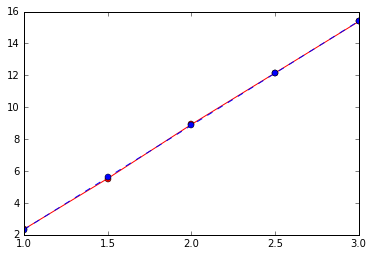

In [6]:
# plot for visual inspection
# substitute xdata for x in function y and append to new list
y1 = []
for i in range(len(xdata)):
    y1.append(y.subs([(x, xdata[i])]))

# plot measured data and calculated data
plt.plot(xdata, ydata, 'ro-', xdata, y1, 'bo--')